### set data

In [1]:
%matplotlib inline
from keras_pack import *
from sklearn.datasets import fetch_olivetti_faces

olivetti = fetch_olivetti_faces()
X = olivetti.data
y = olivetti.target

In [2]:
from sklearn.model_selection import train_test_split 
from keras.utils import np_utils

X = X.reshape(400, 64, 64)

X_train0, X_test0 = train_test_split(X, test_size = .2, random_state=0)
y_train0, y_test0= train_test_split(y, test_size = .2, random_state=0)

X_train = X_train0[:, :,  :, np.newaxis].astype('float32') / 255.0
X_test = X_test0[:, :, :, np.newaxis].astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

Y_train = np_utils.to_categorical(y_train0, 40)
Y_test = np_utils.to_categorical(y_test0, 40)

/home/mk/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


(320, 64, 64, 1) float32


### modeling

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import adam, Adadelta
from keras import regularizers

class CNN(Sequential):
      def __init__(self):
        super().__init__() # Sequential init  상속
        self.add(Conv2D(4, (5, 5), activation='relu', input_shape=(64, 64, 1), padding='same',kernel_initializer="glorot_uniform"))
        self.add(MaxPooling2D()) # 사이즈 줄임
        self.add(Dropout(0.1))
        self.add(Flatten()) # 벡터로 
        self.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform")) # softmax 대신 sigmoid같은것도 가능
        self.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=adam())

In [4]:
model = CNN()

In [8]:
%%time
hist = model.fit(X_train, Y_train, epochs=300, batch_size=150, validation_data=(X_test, Y_test), verbose=0)

CPU times: user 11min 38s, sys: 1min 2s, total: 12min 41s
Wall time: 4min 48s


In [9]:
model.evaluate(X_test, Y_test)

80/80 [==============================] - 0s 1ms/step


[1.6949573040008545, 0.8375]

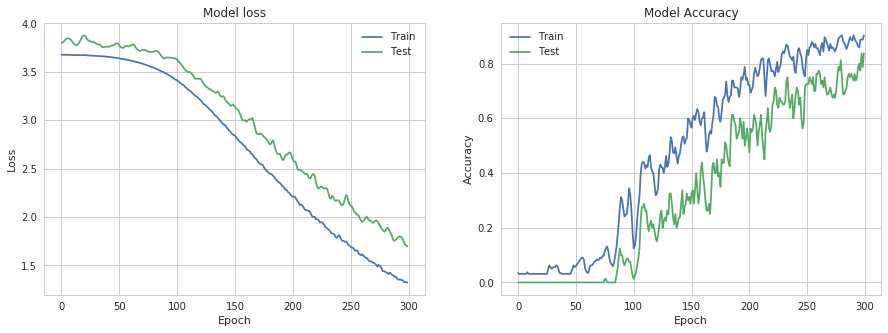

In [10]:
plt.figure(figsize=(15,5))
plt.subplot(121)
plot_loss(hist)
plt.subplot(122)
plot_acc(hist)

---

### Image Augmentation

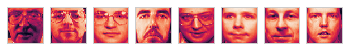

In [3]:
for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.imshow(X_train[i, :, :, 0])
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

In [4]:
from keras.preprocessing.image import ImageDataGenerator 

In [5]:
train_generator = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True)

In [6]:
train_generator.fit(X_train)

In [7]:
batch_size = 8

In [8]:
iterator = train_generator.flow(X_train[:batch_size], Y_train[:batch_size], batch_size=batch_size)

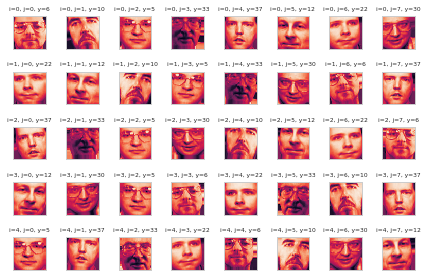

In [9]:
for i in range(int(40 / batch_size)):
    x_augs, y_augs = iterator.next()
    for j in range(batch_size):
        plt.subplot(5, 8, batch_size * i + j + 1)
        plt.imshow(x_augs[j, :, :, 0])
        plt.title("i={}, j={}, y={}".format(i, j, np.argmax(y_augs[j, :])), fontsize=6)
        plt.grid(False)
        plt.xticks([])
        plt.yticks([])
plt.tight_layout()

In [10]:
test_generator = ImageDataGenerator()

In [11]:
train_iterator = train_generator.flow(X_train, Y_train, batch_size=len(X_train))

N = 50
X_train_new = []
Y_train_new = []
for i in range(N):
    x_train_new, y_train_new = train_iterator.next()
    X_train_new.append(x_train_new)
    Y_train_new.append(y_train_new)

In [12]:
X_train_new = np.vstack(X_train_new)
Y_train_new = np.vstack(Y_train_new)

In [13]:
X_train_new.shape

(16000, 64, 64, 1)

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import *
from keras.regularizers import l2

In [15]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout
from keras.optimizers import *

np.random.seed(0)

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adadelta, SGD
from keras.regularizers import l2

np.random.seed(0)

model = Sequential()

model.add(Conv2D(20, (4, 4), activation='relu', input_shape=(64, 64, 1), padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Conv2D(50, (4, 4), activation='relu', padding="same", kernel_initializer="glorot_uniform"))
model.add(MaxPooling2D())
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(100, activation='tanh', kernel_initializer="glorot_uniform"))
model.add(Dense(40, activation='softmax', kernel_initializer="glorot_uniform"))
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=RMSprop())

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 20)        340       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 20)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 20)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 50)        16050     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 50)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 50)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12800)             0         
__________

In [19]:
%%time 
hist1 = model.fit(X_train, Y_train, epochs=20, batch_size=20, validation_data=(X_test, Y_test), verbose=0)
# original

CPU times: user 3min 43s, sys: 26 s, total: 4min 9s
Wall time: 1min 17s


In [22]:
%%time
hist2 = model.fit(X_train_new, Y_train_new, epochs=20, batch_size=20, validation_data=(X_test, Y_test), verbose=0)
# augmented

KeyboardInterrupt: 

NameError: name 'hist2' is not defined

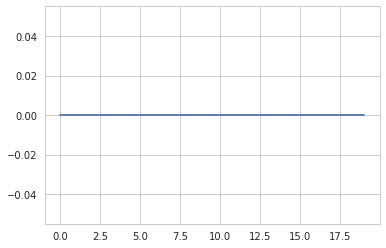

In [23]:
plt.plot(hist1.history['val_acc'], 'b', label="original")
plt.plot(hist2.history['val_acc'], 'r', label="augmented")
plt.ylim(0, 1.02)
plt.legend()
plt.show()